## BREAST CANCER

## Import library

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from  sklearn.preprocessing  import  StandardScaler, LabelEncoder
import pandas as   pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np

## Data Cleaning

In [69]:
data=pd.read_csv("/content/data.csv")
data.drop(["id"],axis=1,inplace=True)
data.drop(["Unnamed: 32"],axis=1,inplace=True)
data.isna().sum()
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Model Training

In [70]:
## Spliting Independent and Dependent Data

feture=data.iloc[:,1:]
target=data['diagnosis']
train_feture,test_feture,train_target,test_target=train_test_split(feture,target,test_size=0.2,random_state=42)

## Label Encoding

le=LabelEncoder()
data['diagnosis']=le.fit_transform(data['diagnosis'])

## Feature Scalling

scaling=StandardScaler()
train_feture_scaled=scaling.fit_transform(train_feture)
test_feture_scaled=scaling.fit_transform(test_feture)

## Model Training

model=KNeighborsClassifier()
model.fit(train_feture_scaled,train_target)

## Prediction

pred=model.predict(test_feture_scaled)

print("Accuracy:",accuracy_score(test_target,pred))
print("Confusion Matrix:\n",confusion_matrix(test_target,pred))
print("Classification Report:\n",classification_report(test_target,pred))

Accuracy: 0.956140350877193
Confusion Matrix:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Data Visualisation

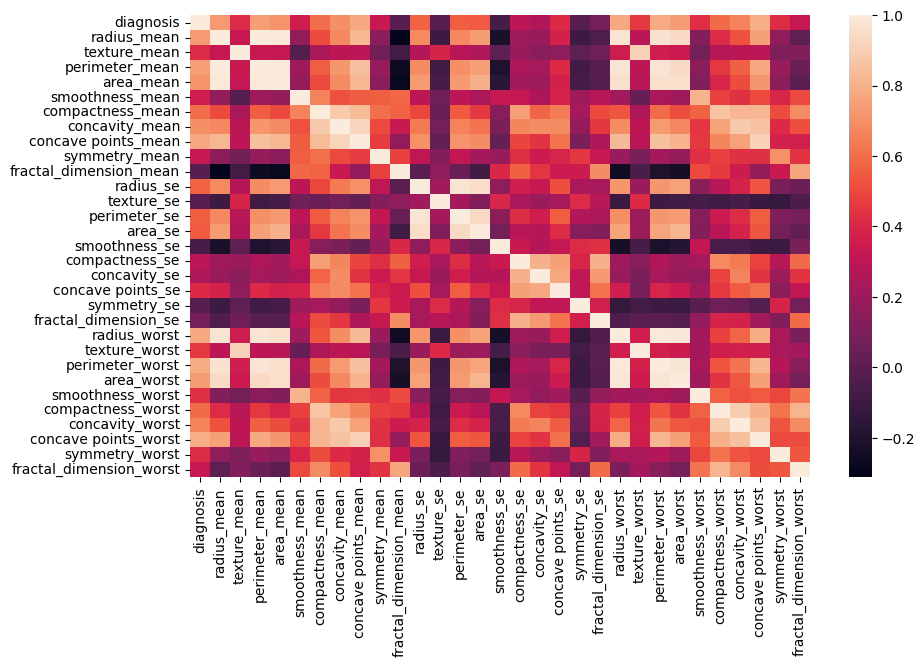

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr())
plt.show()

###  USER INPUT MODEL TESTING

In [47]:
feture=data.iloc[:,1:5]
target=data['diagnosis']
train_feture,test_feture,train_target,test_target=train_test_split(feture,target,test_size=0.2,random_state=42)

le=LabelEncoder()
data['diagnosis']=le.fit_transform(data['diagnosis'])

scaling=StandardScaler()
train_feture_scaled=scaling.fit_transform(train_feture)
test_feture_scaled=scaling.fit_transform(test_feture)

model=KNeighborsClassifier()
model.fit(train_feture_scaled,train_target)

pred=model.predict(test_feture_scaled)

print("Accuracy:",accuracy_score(test_target,pred))
print("Confusion Matrix:\n",confusion_matrix(test_target,pred))
print("Classification Report:\n",classification_report(test_target,pred))

Accuracy: 0.9385964912280702
Confusion Matrix:
 [[67  4]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## Function For User Input

In [68]:
def predict_user_input(user_input):

  user_input=[]
  for i  in  range(4):
    value=float(input(f"Enter the {i}th value:"))
    user_input.append(value)

  user_input_array=np.array(user_input).reshape(1,-1)
  user_input_scal=scaling.transform(user_input_array)
  user_input_pred=model.predict(user_input_scal)
  prediction=le.inverse_transform(user_input_pred)
  return prediction

predic=predict_user_input(user_input)

if predic==1:
  print("Malignant")

else:
  print("Benign")

Enter the 0th value:17.99
Enter the 1th value:10.33
Enter the 2th value:122.0
Enter the 3th value:1001.1
Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
